# Demo of Gradient Boosting for Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import ensemble,tree

import copy

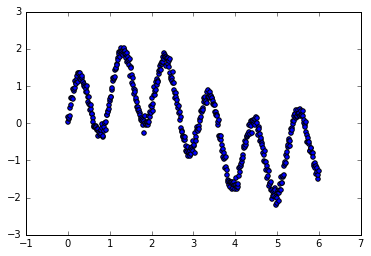

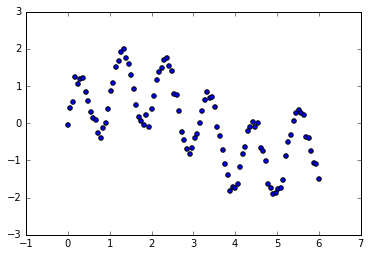

In [8]:
# Create the dataset  1
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 500)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
plt.scatter(X,y)
plt.show()

rng = np.random.RandomState(2)
X_test = np.linspace(0, 6, 100)[:, np.newaxis]
y_test = np.sin(X_test).ravel() + np.sin(6 * X_test).ravel() + rng.normal(0, 0.1, X_test.shape[0])
plt.scatter(X_test,y_test)
plt.show()

In [9]:
# Create the dataset 2 - simple

# rng = np.random.RandomState(1)
# X = np.linspace(0, 6, 100)[:, np.newaxis]
# y = X **2
# plt.scatter(X,y)
# plt.show()

# rng = np.random.RandomState(2)
# X_test = np.linspace(0, 6, 10)[:, np.newaxis]
# y_test = X_test**2
# plt.scatter(X_test,y_test)

In [10]:
X.shape,y.shape, X_test.shape, y_test.shape

((500, 1), (500,), (100, 1), (100,))

In [11]:
# choose base estimator

# simple decision stump
base_learner = tree.DecisionTreeRegressor(max_depth=1)

# straight line
#base_learner = linear_model.LinearRegression()


('boosting iterations:', 0)


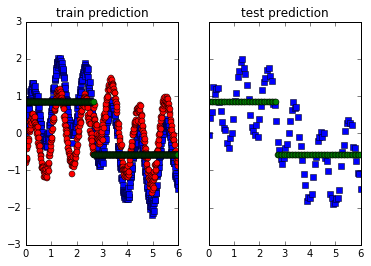

('boosting iterations:', 20)


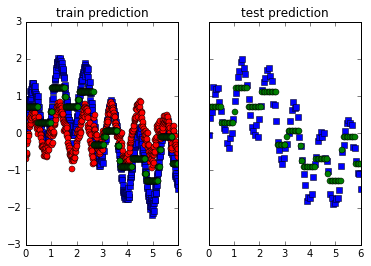

('boosting iterations:', 40)


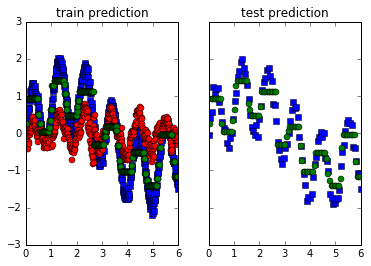

('boosting iterations:', 60)


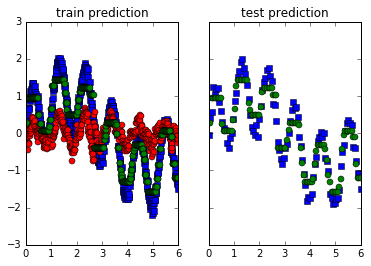

('boosting iterations:', 80)


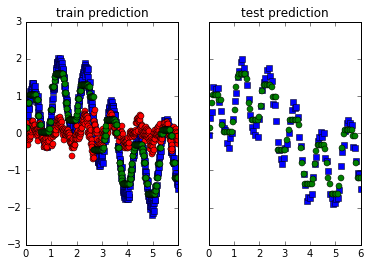

In [12]:



num_iter = 100
const_alpha = 1
weighted_predict = np.zeros(X.shape[0])
predict_test = np.zeros(X_test.shape[0])

learner = {}
alpha = {}

dy = y.ravel() 

for k in xrange(num_iter):
    learner[k] = copy.deepcopy(base_learner)
    learner[k].fit(X,dy)
    alpha[k] = const_alpha
    predict = learner[k].predict(X)
    
    dy = dy - alpha[k] * predict
    weighted_predict = weighted_predict + alpha[k] * predict    
    predict_test = predict_test + alpha[k] * learner[k].predict(X_test)
    
    if k% round(num_iter/5) == 0:
        print('boosting iterations:',k)
        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
        ax1.plot(X,y, 'bs', X,dy,'ro', X,weighted_predict,'go')
        ax1.set_title('train prediction')
        ax2.plot(X_test,y_test, 'bs', X_test,predict_test,'go', label="test data")
        ax2.set_title('test prediction')
        plt.show()

('iteration number:', 0)


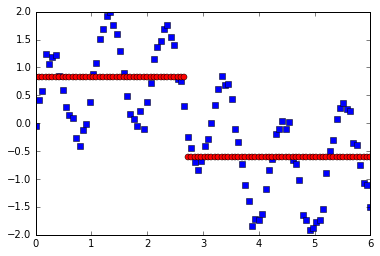

('iteration number:', 20)


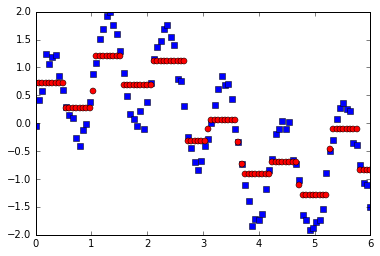

('iteration number:', 40)


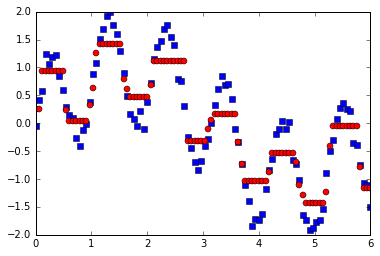

('iteration number:', 60)


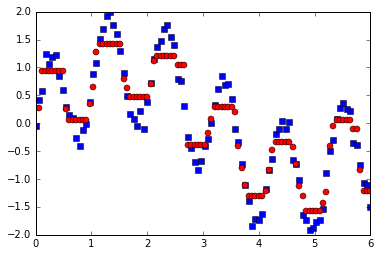

('iteration number:', 80)


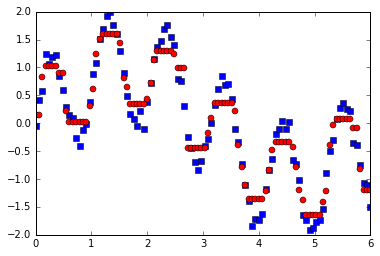

In [13]:
# predictions on test set from previously trained model

predict = np.zeros(X_test.shape[0])
for k in xrange(num_iter):
    predict = predict + alpha[k] * learner[k].predict(X_test)
    
    if k% round(num_iter/5) == 0:
        print('iteration number:',k)
        plt.plot(X_test,y_test, 'bs', X_test,predict.reshape(-1,1),'ro')
        plt.show()
        
#predict = predict / sum(alpha.values())
    